# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

I would define the most profitable item as the item that makes the state the most profit, or retail-cost across all sales. It doesn't make sense to just look at per bottle, because some bottles may have crazy mark-ups but nobody will buy them. So if I create a new column called profit, where I subtract 'State Bottle Retail' by 'State Bottle Cost' and then groupby item and multiply the total bottles sold of each item by the profit per item, I can identify what items are bringing the state the most profit, ie, the most profitable item.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iowa = pd.read_csv('data/iowa.csv')
iowa.head()
iowa['Profit'] = iowa['State Bottle Retail'] - iowa['State Bottle Cost']
iowa['Total Profit'] = iowa['Profit'] * iowa['Bottles Sold']
iowa.groupby('Item Description')['Total Profit'].sum().sort_values(ascending=False).head(1)



Item Description
TITOS HANDMADE VODKA    364074.35
Name: Total Profit, dtype: float64

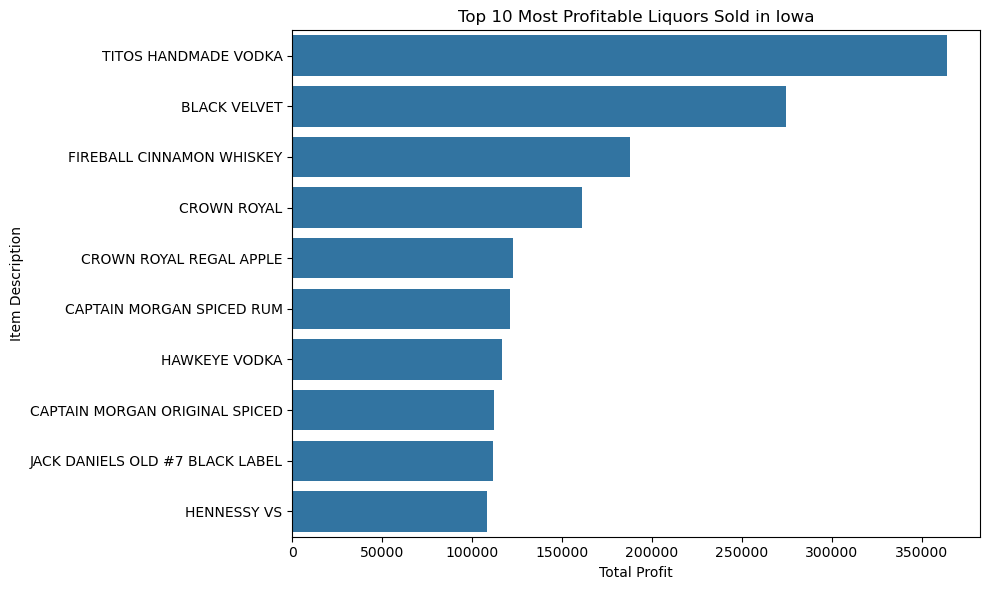

In [27]:
top_liquors = iowa.groupby('Item Description')['Total Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_liquors.values, y=top_liquors.index)
plt.xlabel('Total Profit')
plt.ylabel('Item Description')
plt.title('Top 10 Most Profitable Liquors Sold in Iowa')
plt.tight_layout()
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [28]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

When I tried to subtract these vectors, it did not work as the vectors do not have the same dimensions.

In [29]:
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [30]:
x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

In [31]:
matrix1 = np.zeros((3,2)) 
for i, elem in enumerate(x):
    for j, elem2 in enumerate(y):
        matrix1[i,j] = elem-elem2
print(matrix1)

matrix2 = np.zeros((2,3))
for i, elem in enumerate(y):
    for j, elem2 in enumerate(x):
        matrix2[i,j] = elem2-elem
print(matrix2)

[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]
[[-1.  1.  3.]
 [-4. -2.  0.]]


x.reshape(1,-1) turns the data from a 1D array to a 2D array. Using a positive 1 in the first parameter, means that it is reshaped into a row array, and a positive 1 in the second means it turns into a column array. This allows numpy to broadcast with other 2D arrays, as long as there is one shared dimension. 

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

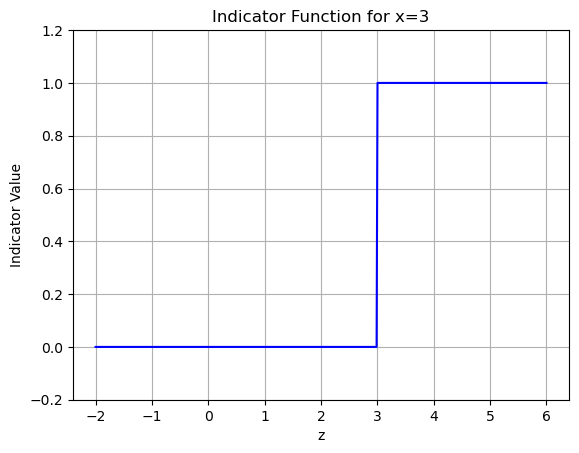

In [32]:

z = np.linspace(-2, 6, 500)
x = 3
indicator = (x <= z).astype(int)

plt.plot(z, indicator, color='blue')
plt.ylim(-0.2, 1.2)
plt.xlabel("z")
plt.ylabel("Indicator Value")
plt.title("Indicator Function for x=3")
plt.grid(True)
plt.show()


$ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$ These indicator functions will always produce opposite results as the inequalities are mutually exclusive, yet all inclusive. This means that whenever $\mathbb{I}\{ x \le z \}$ returns a 0, $\mathbb{I}\{ x > z \}$ will return a 1. This means the sum of these two will always be equal to 1, or $ 1 = \mathbb{I}\{ x > z \} + \mathbb{I}\{ x \le z \}$. We can then use algebra to show that $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$

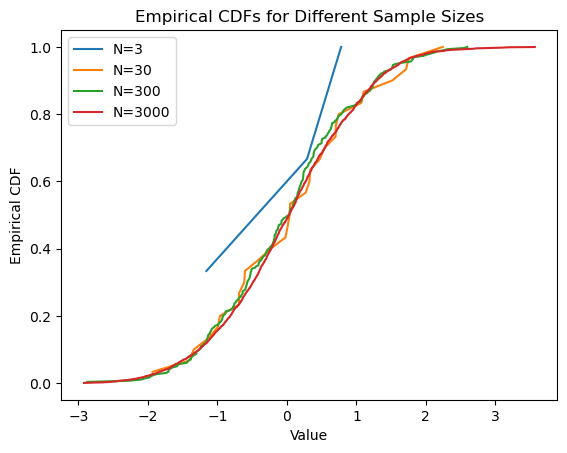

In [33]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)
def ecdf(x, plot = True):
    Z = np.sort(x.unique())
    compare = x.to_numpy().reshape(-1,1) <= Z.reshape(1,-1)
    
    ecdf = np.mean(compare,axis=0)
    
    if plot:
        title_str = x.name
        plt.plot(Z,ecdf)
        plt.title(f'Empirical CDF: {title_str}')
        plt.ylabel('Proportion')
        plt.xlabel(title_str)

    return ecdf, Z

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    F_X, _ = ecdf(pd.Series(X), plot=False)
    plt.plot(_,F_X,label=f'N={N}')
plt.title('Empirical CDFs for Different Sample Sizes')
plt.xlabel('Value')
plt.ylabel('Empirical CDF')
plt.legend()
plt.show()


As Sample size increases, the ecdf smoothes out and becomes closer and closer to the normal distribution. This makes sense as the law or large numbers explains that as sample size increases, we expect the sample to become closer and closer to the true distribution. As the random numbers were generated from the normal distribution, it makes sense that as sample size increases, the ECDF is more representative of the normal distribution.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [34]:
def get_quantile(x, quantile):
        dist = (ecdf(x,plot = False)[0]-quantile) ** 2
        closest_indices = np.where( dist == dist.min() )
        q = np.mean(ecdf(x,plot = False)[1][closest_indices])
        return q


In [35]:
def get_IQR(x):
    Q1 = get_quantile(x, 0.25)
    Q3 = get_quantile(x, 0.75)
    IQR = Q3 - Q1
    whisker_length = 1.5 * IQR
    whiskers = (Q1 - whisker_length, Q3 + whisker_length)
    return IQR, whiskers
 

In [48]:
def five_number_summary(x):
        min = np.min(x)
        max = np.max(x)
        first_quartile = get_quantile(x,0.25)
        third_quartile = get_quantile(x,0.75)
        median = np.median(x)
        IQR, whiskers = get_IQR(x)
        return (f"min: {min}\n"
            f"max: {max}\n"
            f"first_quartile: {first_quartile}\n"
            f"third_quartile: {third_quartile}\n"
            f"median: {median}\n"
            f"whiskers: {whiskers}")

five_number_summary(pd.Series(rng.normal(0,1,3000)))

'min: -3.068657503137224\nmax: 3.7610650291660876\nfirst_quartile: -0.6732088679352143\nthird_quartile: 0.6857702620685351\nmedian: 0.02665028945182899\nwhiskers: (np.float64(-2.711677562940838), np.float64(2.7242389570741588))'

In [37]:
def is_outlier(x):
    IQR, whiskers = get_IQR(x)
    outliers = (x < whiskers[0]) | (x > whiskers[1])
    return outliers 

count    159904.000000
mean         49.078793
std         153.467941
min        -543.000000
25%          12.180000
50%          26.220000
75%          51.000000
max       12240.000000
Name: Total Profit, dtype: float64
min: -543.0
max: 12240.0
first_quartile: 12.180000000000003
third_quartile: 50.94000000000001
median: 26.219999999999995
whiskers: (np.float64(-45.96000000000001), np.float64(109.08000000000001))
0         False
1         False
2         False
3         False
4         False
          ...  
159899    False
159900    False
159901    False
159902    False
159903    False
Name: Total Profit, Length: 159904, dtype: bool


<Axes: xlabel='Total Profit'>

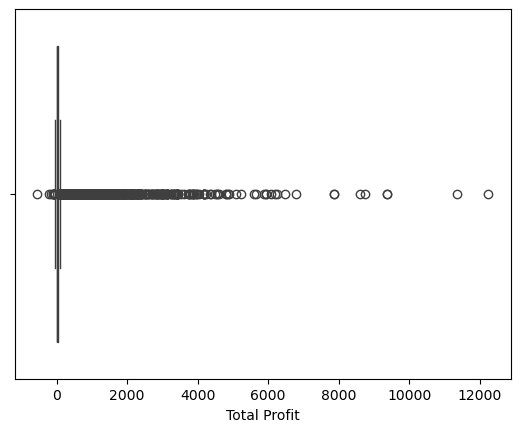

In [50]:
profit = iowa['Total Profit']
print(profit.describe())
print(five_number_summary(profit))
print(is_outlier(profit))
sns.boxplot(x=profit)




5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?